In [ ]:
import xml.etree.ElementTree as ET

def extract_text_from_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    text_content = []
    for body in root.findall('.//body'):
        for p in body.findall('.//p'):
            text_content.append(p.text)
    return ' '.join(text_content)

xml_file_path = 'apwcf1.xml'
text_data = extract_text_from_xml(xml_file_path)
print(text_data[:500])


 Je metz en teste la date de cette lettre comme la meilleure chose que je puisse escrire à Vostre Majesté et dont elle attend l' advis il y a long temps . Cella m' a faict haster en sorte que nonobstant la contrariété du vent quand j' ay esté sur le Zuiderzée et les difficultéz du charroy quand j' ay pris le chemin de terre , j' arrivay hier en cette ville . Je faisois estat , Madame , d' y entrer sans bruict cette première fois , affin d' avoir un jour ou deux pour donner ordre à ma maison et p


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")
spacy.cli.download("fr_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

def perform_ner(text, model='fr_core_news_sm'):
    nlp = spacy.load(model)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

french_entities = perform_ner(text_data)
print(french_entities[:10])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


[('Vostre Majesté', 'LOC'), ('ay', 'LOC'), ('Zuiderzée', 'LOC'), ('charroy', 'LOC'), ('ay', 'LOC'), ('Madame', 'PER'), ('Ambassadeurs', 'ORG'), ("l' Empereur", 'PER'), ("Roy d' Espagne", 'PER'), ('Ilz', 'LOC')]


In [ ]:
from transformers import pipeline

def sentiment_analysis(text):
    sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")
    return sentiment_model(text)

sentiment_results = sentiment_analysis(text_data[:1000])
print(sentiment_results)


[{'label': 'negative', 'score': 0.36535340547561646}]


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

#load gpu
def setup_gpu():
    device = 0 if torch.cuda.is_available() else -1
    return device

def sentiment_analysis(text, model, tokenizer, device):
    sentiment_model = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)
    return sentiment_model(text)

#Contextualized sentiment alaysis considering the entities
def contextual_sentiment_analysis(text, entities, sentiment_model, tokenizer, device):
    sentences = text.split('.')
    context_sentiments = []

    for sentence in sentences:
        for entity in french_entities:
            if entity[0] in sentence:
                sentiment = sentiment_analysis(sentence, sentiment_model, tokenizer, device)
                context_sentiments.append({
                    'entity': entity[0],
                    'sentence': sentence,
                    'sentiment': sentiment
                })

    return context_sentiments

model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = setup_gpu()

context_sentiments = contextual_sentiment_analysis(text_data, entities, model, tokenizer, device)
for cs in context_sentiments:
    print(cs)


Streaming output truncated to the last 5000 lines.
{'entity': 'Monsieur', 'sentence': "   Le public se doibt satisfaire de celuy que Sa Majesté donne de désirer la paix par le soing qu' elle veut prendre de la moyenner entre les Couronnes de Dannemarck et de Suède , et sans doubte en vous advanceant au lieu destiné pour le traitté général , vous aurez eu des advis qui vous auront donné lieu de presser Monsieur de La Thuillerie ", 'sentiment': [{'label': 'positive', 'score': 0.43232735991477966}]}
{'entity': 'Monsieur', 'sentence': "   Le public se doibt satisfaire de celuy que Sa Majesté donne de désirer la paix par le soing qu' elle veut prendre de la moyenner entre les Couronnes de Dannemarck et de Suède , et sans doubte en vous advanceant au lieu destiné pour le traitté général , vous aurez eu des advis qui vous auront donné lieu de presser Monsieur de La Thuillerie ", 'sentiment': [{'label': 'positive', 'score': 0.43232735991477966}]}
{'entity': 'Monsieur', 'sentence': "   Le publi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for cs in context_sentiments:
    entity = cs['entity']
    sentence = cs['sentence']
    sentiment_label = cs['sentiment'][0]['label']
    sentiment_score = cs['sentiment'][0]['score']
    print(f"Entity: {entity}\nSentence: {sentence}\nSentiment: {sentiment_label} (Confidence: {sentiment_score:.2f})\n")


Entity: Vostre Majesté
Sentence:  Je metz en teste la date de cette lettre comme la meilleure chose que je puisse escrire à Vostre Majesté et dont elle attend l' advis il y a long temps 
Sentiment: positive (Confidence: 0.93)

Entity: Vostre Majesté
Sentence:  Je metz en teste la date de cette lettre comme la meilleure chose que je puisse escrire à Vostre Majesté et dont elle attend l' advis il y a long temps 
Sentiment: positive (Confidence: 0.93)

Entity: Vostre Majesté
Sentence:  Je metz en teste la date de cette lettre comme la meilleure chose que je puisse escrire à Vostre Majesté et dont elle attend l' advis il y a long temps 
Sentiment: positive (Confidence: 0.93)

Entity: Vostre Majesté
Sentence:  Je metz en teste la date de cette lettre comme la meilleure chose que je puisse escrire à Vostre Majesté et dont elle attend l' advis il y a long temps 
Sentiment: positive (Confidence: 0.93)

Entity: Vostre Majesté
Sentence:  Je metz en teste la date de cette lettre comme la meilleur

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



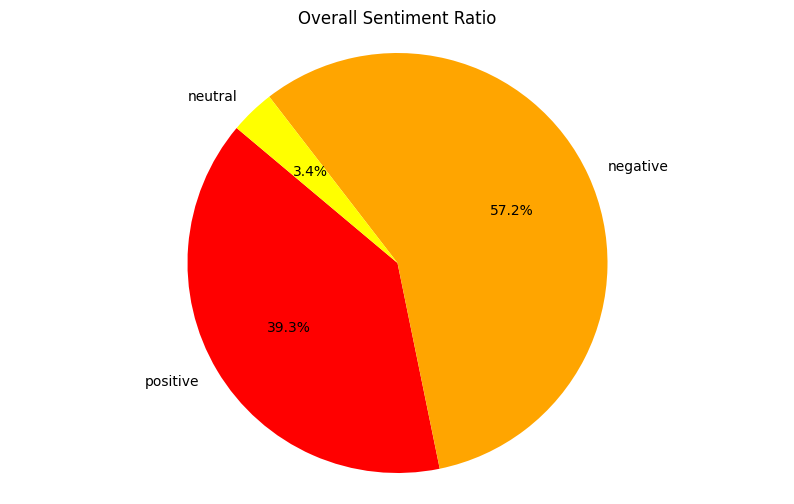

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

#Aggregate sentiment scores
def aggregate_overall_sentiment(context_sentiments):
    overall_sentiment_summary = defaultdict(int)

    for cs in context_sentiments:
        sentiment_label = cs['sentiment'][0]['label']
        overall_sentiment_summary[sentiment_label] += 1

    return overall_sentiment_summary

#Visualize overall sentiment ratio
def visualize_overall_sentiment_ratio(overall_sentiment_summary):
    labels, counts = zip(*overall_sentiment_summary.items())

    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow'])
    plt.title("Overall Sentiment Ratio")
    plt.axis('equal')
    plt.show()

overall_sentiment_summary = aggregate_overall_sentiment(context_sentiments)

visualize_overall_sentiment_ratio(overall_sentiment_summary)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Average Sentiment Scores by Entity Type:
ORG: 0.57
MISC: 0.57
PER: 0.56
LOC: 0.55


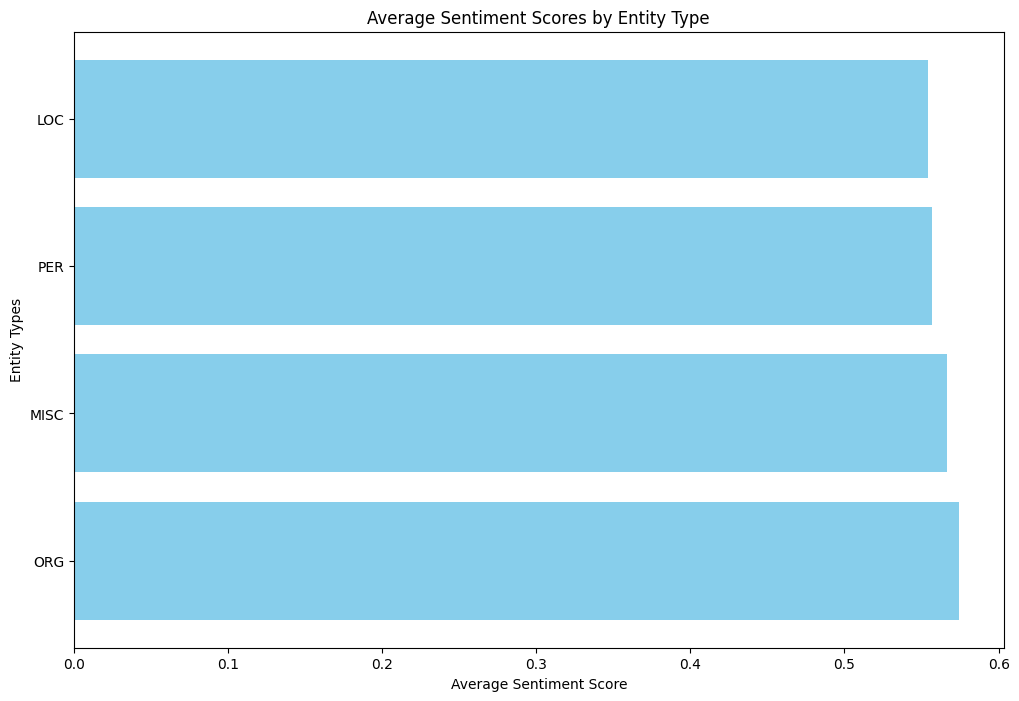

In [ ]:
#Find NER
def perform_ner_with_types(text, model='fr_core_news_sm'):
    nlp = spacy.load(model)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_with_types = perform_ner_with_types(text_data)

#Update context_sentiments to include entity types
context_sentiments_with_types = []

for cs in context_sentiments:
    entity_text = cs['entity']
    entity_type = next((etype for etext, etype in entities_with_types if etext == entity_text), 'UNKNOWN')
    cs['entity_type'] = entity_type
    context_sentiments_with_types.append(cs)

#Function to aggregate sentiment scores by entity type
def aggregate_sentiment_by_type(context_sentiments):
    sentiment_scores_by_type = defaultdict(list)

    for cs in context_sentiments:
        entity_type = cs['entity_type']
        sentiment_score = cs['sentiment'][0]['score']
        sentiment_scores_by_type[entity_type].append(sentiment_score)
    avg_sentiment_score_by_type = {etype: sum(scores) / len(scores) for etype, scores in sentiment_scores_by_type.items()}

    return avg_sentiment_score_by_type

#Perform the aggregation by entity type
avg_sentiment_score_by_type = aggregate_sentiment_by_type(context_sentiments_with_types)

#Sort the results
sorted_avg_sentiment_by_type = sorted(avg_sentiment_score_by_type.items(), key=lambda item: item[1], reverse=True)

print("Average Sentiment Scores by Entity Type:")
for entity_type, score in sorted_avg_sentiment_by_type:
    print(f"{entity_type}: {score:.2f}")

#Visualize the results
def visualize_sentiment_by_entity_type(avg_sentiment_score_by_type):
    entity_types, scores = zip(*sorted_avg_sentiment_by_type)

    plt.figure(figsize=(12, 8))
    plt.barh(entity_types, scores, color='skyblue')
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Entity Types")
    plt.title("Average Sentiment Scores by Entity Type")
    plt.show()

visualize_sentiment_by_entity_type(avg_sentiment_score_by_type)


Most Positive Entity: nostre venue with an average sentiment score of 0.94
Most Negative Entity: Zund with an average sentiment score of 0.37


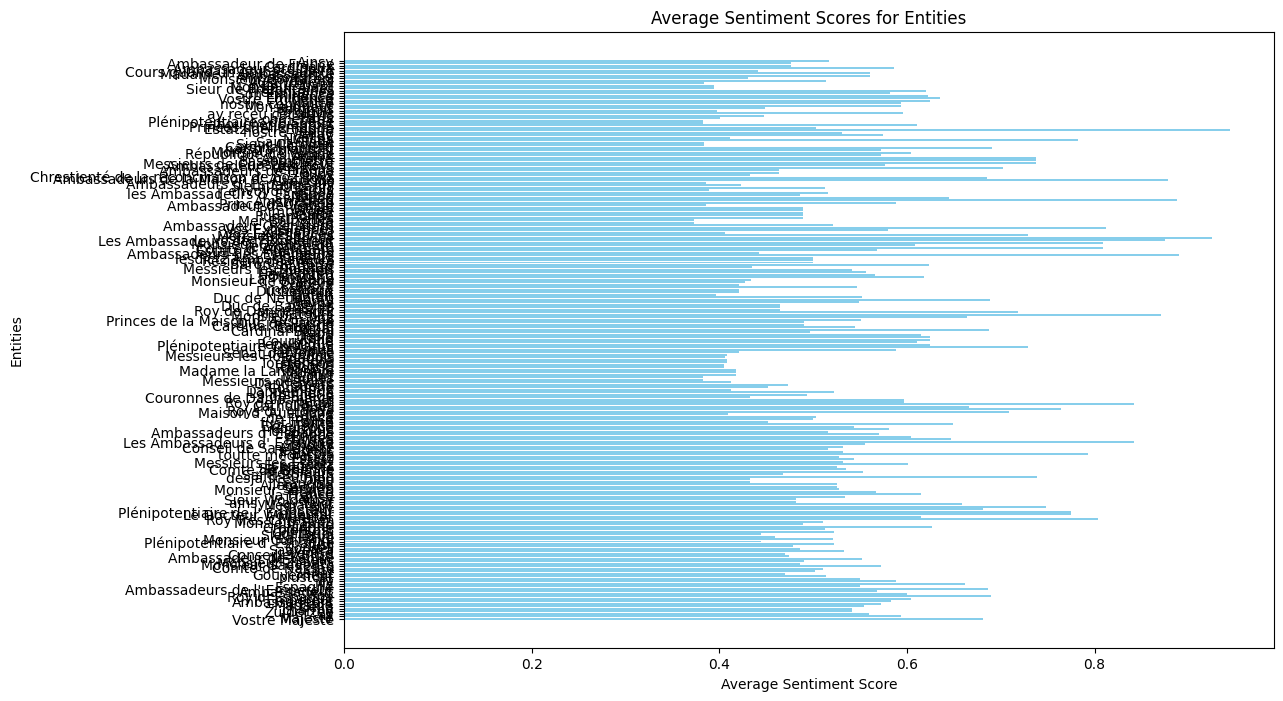

In [ ]:
#Function to aggregate sentiment scores and find the most positive and negative entities
def aggregate_sentiment(context_sentiments):
    sentiment_scores = defaultdict(list)

    for cs in context_sentiments:
        entity = cs['entity']
        sentiment_score = cs['sentiment'][0]['score']
        sentiment_scores[entity].append(sentiment_score)

    #Calculate average sentiment score for each entity
    avg_sentiment_score = {entity: sum(scores) / len(scores) for entity, scores in sentiment_scores.items()}

    #Find the entity with the highest and lowest average sentiment score
    most_positive_entity = max(avg_sentiment_score, key=avg_sentiment_score.get)
    most_negative_entity = min(avg_sentiment_score, key=avg_sentiment_score.get)

    return avg_sentiment_score, most_positive_entity, most_negative_entity

#Perform the aggregation
avg_sentiment_score, most_positive_entity, most_negative_entity = aggregate_sentiment(context_sentiments)

print(f"Most Positive Entity: {most_positive_entity} with an average sentiment score of {avg_sentiment_score[most_positive_entity]:.2f}")
print(f"Most Negative Entity: {most_negative_entity} with an average sentiment score of {avg_sentiment_score[most_negative_entity]:.2f}")

#Visualize the sentiment scores for all entities
def visualize_entity_sentiments(avg_sentiment_score):
    entities = list(avg_sentiment_score.keys())
    scores = list(avg_sentiment_score.values())

    plt.figure(figsize=(12, 8))
    plt.barh(entities, scores, color='skyblue')
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Entities")
    plt.title("Average Sentiment Scores for Entities")
    plt.show()

visualize_entity_sentiments(avg_sentiment_score)


Top 10 Positive Entities:
Vos Excellences: 0.81
Les Ambassadeurs d' Espagne: 0.84
Catholiques: 0.84
Monsieur Chigi: 0.87
Les Ambassadeurs de l' Empereur: 0.88
Capucins: 0.88
Amstredam: 0.89
Hollande: 0.89
Vostre Excellence: 0.93
nostre venue: 0.94

Top 10 Negative Entities:
Zund: 0.37
Mer Balticque: 0.37
aboucher bientost: 0.38
Plénipotentiaires de Suède: 0.38
Messieurs de Rorté: 0.38
Meulles: 0.38
pû treuver: 0.38
Cardinal Ginetti: 0.38
Sieur Cardinal: 0.38
Ambassadeur de Venize: 0.39


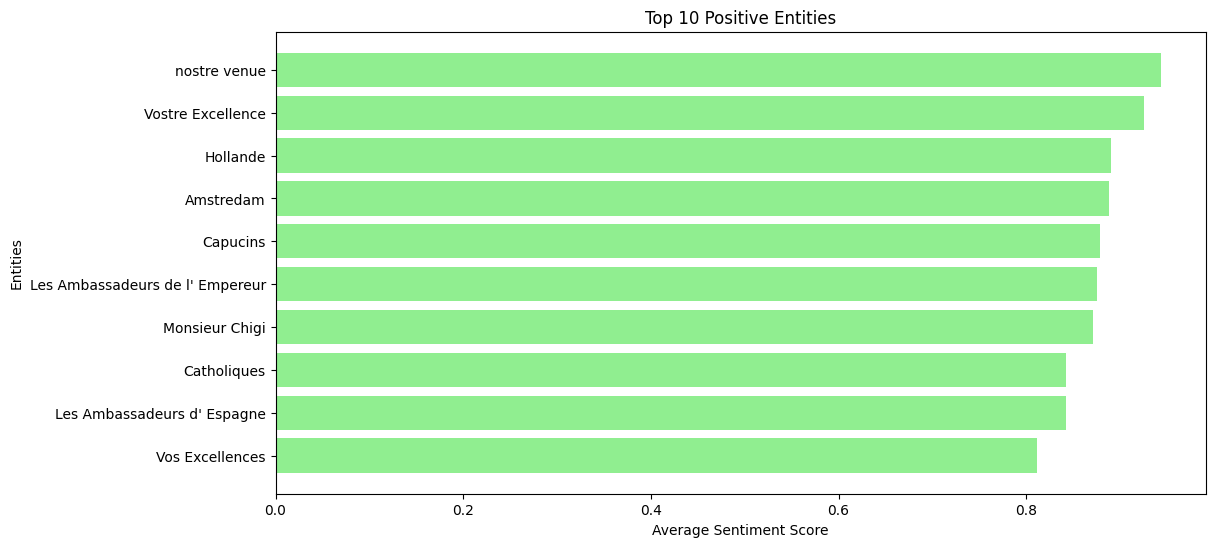

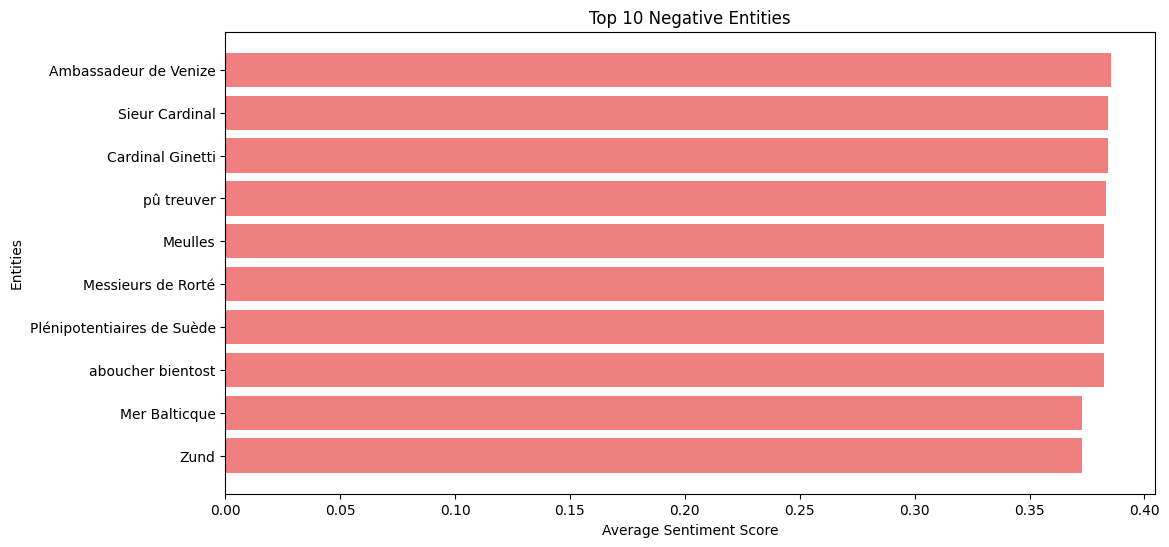

In [ ]:
#Function to aggregate sentiment scores and find the top positive and negative entities
def aggregate_sentiment(context_sentiments):
    sentiment_scores = defaultdict(list)

    for cs in context_sentiments:
        entity = cs['entity']
        sentiment_score = cs['sentiment'][0]['score']
        sentiment_scores[entity].append(sentiment_score)

    #Calculate average sentiment score for each entity
    avg_sentiment_score = {entity: sum(scores) / len(scores) for entity, scores in sentiment_scores.items()}

    #Sort entities by average sentiment score
    sorted_sentiment_scores = sorted(avg_sentiment_score.items(), key=lambda x: x[1])

    #Get top 10 negative and top 10 positive entities
    top_10_negative = sorted_sentiment_scores[:10]
    top_10_positive = sorted_sentiment_scores[-10:]

    return avg_sentiment_score, top_10_positive, top_10_negative

#Perform the aggregation
avg_sentiment_score, top_10_positive, top_10_negative = aggregate_sentiment(context_sentiments)

#Display the results
print("Top 10 Positive Entities:")
for entity, score in top_10_positive:
    print(f"{entity}: {score:.2f}")

print("\nTop 10 Negative Entities:")
for entity, score in top_10_negative:
    print(f"{entity}: {score:.2f}")

#Visualize the results
def visualize_top_entities(top_10_positive, top_10_negative):
    positive_entities, positive_scores = zip(*top_10_positive)
    plt.figure(figsize=(12, 6))
    plt.barh(positive_entities, positive_scores, color='lightgreen')
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Entities")
    plt.title("Top 10 Positive Entities")
    plt.show()

    negative_entities, negative_scores = zip(*top_10_negative)
    plt.figure(figsize=(12, 6))
    plt.barh(negative_entities, negative_scores, color='lightcoral')
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Entities")
    plt.title("Top 10 Negative Entities")
    plt.show()

visualize_top_entities(top_10_positive, top_10_negative)
